In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt


# Constants


In [17]:

MAP_SIZE = 100
SEA_LEVEL = 0
INITIAL_TOKENS = 10000
COASTLINE_AGENT_COUNT = 1


# Environment Initialization


In [18]:
terrain = np.full((MAP_SIZE, MAP_SIZE), SEA_LEVEL - 1.0)  # Start with all points below sea level


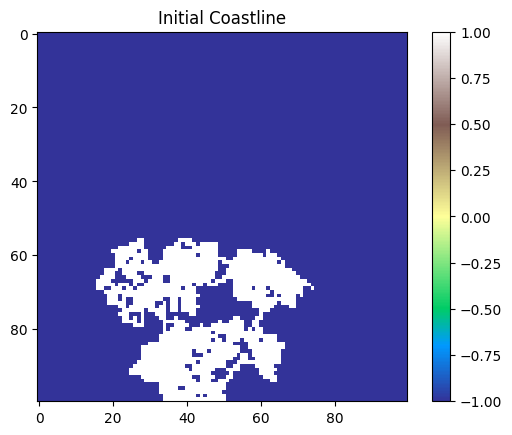

In [19]:



# Agent Base Class
class Agent:
    def __init__(self, x, y, tokens):
        self.x = x
        self.y = y
        self.tokens = tokens

    def move(self):
        raise NotImplementedError

    def act(self):
        raise NotImplementedError

# Coastline Agent
class CoastlineAgent(Agent):
    def __init__(self, x, y, tokens):
        super().__init__(x, y, tokens)

    def move(self):
        direction = random.choice(['up', 'down', 'left', 'right'])
        if direction == 'up' and self.x > 0:
            self.x -= 1
        elif direction == 'down' and self.x < MAP_SIZE - 1:
            self.x += 1
        elif direction == 'left' and self.y > 0:
            self.y -= 1
        elif direction == 'right' and self.y < MAP_SIZE - 1:
            self.y += 1

    def act(self):
        if self.tokens > 0:
            attractor = (random.randint(0, MAP_SIZE - 1), random.randint(0, MAP_SIZE - 1))
            repulser = (random.randint(0, MAP_SIZE - 1), random.randint(0, MAP_SIZE - 1))
            for _ in range(self.tokens):
                self.move()
                dr = np.hypot(self.x - repulser[0], self.y - repulser[1])**2 # square distance from repulsor
                da = np.hypot(self.x - attractor[0], self.y - attractor[1])**2 # square distance from attractor
                de = np.min([self.x, self.y, MAP_SIZE - self.x, MAP_SIZE - self.y]) # square distance from nearest edge
                score =  dr - da + 3*de
                if score < 0:
                    terrain[self.x, self.y] = SEA_LEVEL + 1.0  # Raise above sea level
                self.tokens -= 1

# Create and execute coastline agents
coastline_agents = [CoastlineAgent(random.randint(0, MAP_SIZE-1), random.randint(0, MAP_SIZE-1), INITIAL_TOKENS // COASTLINE_AGENT_COUNT) for _ in range(COASTLINE_AGENT_COUNT)]

for agent in coastline_agents:
    agent.act()

# Visualize the initial coastline
plt.imshow(terrain, cmap='terrain')
plt.colorbar()
plt.title("Initial Coastline")
plt.show()

# Further steps: Implement SmoothingAgent, BeachAgent, MountainAgent, HillAgent, and RiverAgent with their respective behaviors.

# Example of class definitions for other agent types would follow similarly.
